# MSA 2024 Phase 2 - Part 2

In [23]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from xgboost import XGBRegressor


## 1. Load and split preprocessed data

In [11]:
# Load the dataset
store_sales_df_model = pd.read_csv('../0. Resources/datasets/X store sales/store_sales_model.csv')
store_sales_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Postal Code               2080 non-null   int64  
 1   Sales                     2080 non-null   float64
 2   Quantity                  2080 non-null   int64  
 3   Discount                  2080 non-null   float64
 4   Profit                    2080 non-null   float64
 5   Ship Mode_First Class     2080 non-null   int64  
 6   Ship Mode_Same Day        2080 non-null   int64  
 7   Ship Mode_Second Class    2080 non-null   int64  
 8   Ship Mode_Standard Class  2080 non-null   int64  
 9   Segment_Consumer          2080 non-null   int64  
 10  Segment_Corporate         2080 non-null   int64  
 11  Segment_Home Office       2080 non-null   int64  
 12  Sub-Category_Bookcases    2080 non-null   int64  
 13  Sub-Category_Chairs       2080 non-null   int64  
 14  Sub-Cate

In [12]:
# Correlation analysis
correlation_matrix = store_sales_df_model.corr()
print(correlation_matrix['Sales'].sort_values(ascending=False))

Sales                       1.000000
Sales_Rolling_Mean_3        0.595921
Quantity                    0.403819
Sales_Rolling_Mean_7        0.392974
Sub-Category_Tables         0.295041
Sub-Category_Chairs         0.262512
Profit                      0.114192
Sub-Category_Bookcases      0.104058
Week                        0.039652
Sales_Lag_1                 0.038428
Sales_Lag_3                 0.032298
Sales_Lag_2                 0.030605
Quarter                     0.027651
Segment_Corporate           0.019271
Ship Mode_Same Day          0.012716
Postal Code                 0.012661
Ship Mode_Standard Class    0.002628
Ship Mode_First Class      -0.003076
Discount                   -0.004970
Segment_Home Office        -0.007209
Ship Mode_Second Class     -0.007848
Segment_Consumer           -0.012340
Sub-Category_Furnishings   -0.512658
Name: Sales, dtype: float64


C:\Users\wangy\AppData\Local\Temp\ipykernel_34464\2053685263.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store_sales_df_model.corr()


In [13]:
# Select features based on correlation analysis
selected_features = ['Sales_Rolling_Mean_3', 'Sales_Rolling_Mean_7', 
                     'Sub-Category_Tables', 'Sub-Category_Chairs',  
                     'Sub-Category_Bookcases', 'Week', 'Sales_Lag_1', 
                     'Segment_Consumer','Sub-Category_Furnishings' ]

target = 'Sales'

X = store_sales_df_model[selected_features]
y = store_sales_df_model[target]

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Choose an algorithm

1. **Linear Regression Model**: Used to capture the linear relationship between data.

2. **ARIMA Model**:Classic time series model, suitable for trend and seasonal time series data.

3. **Random Forest Model**: It can capture the nonlinear relationship of data and deal with multi-dimensional features well.

4. **XGBoost Model**: Efficient gradient boosting algorithms often perform well on structured data.

## 3. Train and test a model

In [16]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Forcast
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Model Performance:")
print(f"Training MSE: {mse_train_lr}, RMSE: {rmse_train_lr}, R²: {r2_train_lr}")
print(f"Testing MSE: {mse_test_lr}, RMSE: {rmse_test_lr}, R²: {r2_test_lr}")

# Displaying model coefficients
coefficients_lr = pd.DataFrame(lr_model.coef_, selected_features, columns=['Coefficient'])
print(coefficients_lr)

Linear Regression Model Performance:
Training MSE: 58455.7128974063, RMSE: 241.77616279816814, R²: 0.5953048493143062
Testing MSE: 67549.25775733797, RMSE: 259.9024004455095, R²: 0.5733333357308185
                          Coefficient
Sales_Rolling_Mean_3         1.303145
Sales_Rolling_Mean_7        -0.033253
Sub-Category_Tables         78.971710
Sub-Category_Chairs         57.906215
Sub-Category_Bookcases      24.688377
Week                         1.054072
Sales_Lag_1                 -0.428916
Segment_Consumer            -2.159355
Sub-Category_Furnishings  -161.566302


In [17]:
# Train Random Forest Model 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forcast
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Performance:")
print(f"Training MSE: {mse_train_rf}, RMSE: {rmse_train_rf}, R²: {r2_train_rf}")
print(f"Testing MSE: {mse_test_rf}, RMSE: {rmse_test_rf}, R²: {r2_test_rf}")

Random Forest Model Performance:
Training MSE: 7970.9028523113175, RMSE: 89.27991292732827, R²: 0.9448165872755906
Testing MSE: 67407.5386541472, RMSE: 259.6296182143848, R²: 0.5742284871955294


In [18]:
# ARIMA
# Prepare the time series data
sales_ts = store_sales_df_model.set_index('Order Date')['Sales']

# Splite the data
train_size = int(len(sales_ts) * 0.8)
train_ts, test_ts = sales_ts[:train_size], sales_ts[train_size:]

# Train ARIMA model
arima_model = ARIMA(train_ts, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forcast
y_pred_arima = arima_model_fit.forecast(steps=len(test_ts))

# Evaluate
mse_arima = mean_squared_error(test_ts, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(test_ts, y_pred_arima)

print("ARIMA Model Performance:")
print(f"Testing MSE: {mse_arima}, RMSE: {rmse_arima}, R²: {r2_arima}")

ARIMA Model Performance:
Testing MSE: 203876.4124571202, RMSE: 451.526757188453, R²: -0.6735310022121319


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

In [19]:

# Train XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Forcast
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print("XGBoost Model Performance:")
print(f"Training MSE: {mse_train_xgb}, RMSE: {rmse_train_xgb}, R²: {r2_train_xgb}")
print(f"Testing MSE: {mse_test_xgb}, RMSE: {rmse_test_xgb}, R²: {r2_test_xgb}")

XGBoost Model Performance:
Training MSE: 1126.5241440550506, RMSE: 33.56373257036605, R²: 0.9922009528986574
Testing MSE: 80929.7017497962, RMSE: 284.4814611706643, R²: 0.4888173899714797


In [22]:
#Tuning of parameters
# Define the parameter grid for the random forest model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the random forest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning was performed using GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf_model = rf_grid_search.best_estimator_
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

# Forcast
y_train_pred_best_rf = best_rf_model.predict(X_train)
y_test_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
mse_train_best_rf = mean_squared_error(y_train, y_train_pred_best_rf)
rmse_train_best_rf = np.sqrt(mse_train_best_rf)
r2_train_best_rf = r2_score(y_train, y_train_pred_best_rf)

mse_test_best_rf = mean_squared_error(y_test, y_test_pred_best_rf)
rmse_test_best_rf = np.sqrt(mse_test_best_rf)
r2_test_best_rf = r2_score(y_test, y_test_pred_best_rf)

print("Tuned Random Forest Model Performance:")
print(f"Training MSE: {mse_train_best_rf}, RMSE: {rmse_train_best_rf}, R²: {r2_train_best_rf}")
print(f"Testing MSE: {mse_test_best_rf}, RMSE: {rmse_test_best_rf}, R²: {r2_test_best_rf}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Model Performance:
Training MSE: 24996.977407310384, RMSE: 158.10432444215556, R²: 0.8269432526416556
Testing MSE: 63026.42655129865, RMSE: 251.05064539112155, R²: 0.6019012485073836


In [24]:
# Define the parameter grid of the XGBoost model
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Instantiate the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Hyperparameter tuning was performed using GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_xgb_model = xgb_grid_search.best_estimator_
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")

# Make predictions
y_train_pred_best_xgb = best_xgb_model.predict(X_train)
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluating model performance
mse_train_best_xgb = mean_squared_error(y_train, y_train_pred_best_xgb)
rmse_train_best_xgb = np.sqrt(mse_train_best_xgb)
r2_train_best_xgb = r2_score(y_train, y_train_pred_best_xgb)

mse_test_best_xgb = mean_squared_error(y_test, y_test_pred_best_xgb)
rmse_test_best_xgb = np.sqrt(mse_test_best_xgb)
r2_test_best_xgb = r2_score(y_test, y_test_pred_best_xgb)

print("Tuned XGBoost Model Performance:")
print(f"Training MSE: {mse_train_best_xgb}, RMSE: {rmse_train_best_xgb}, R²: {r2_train_best_xgb}")
print(f"Testing MSE: {mse_test_best_xgb}, RMSE: {rmse_test_best_xgb}, R²: {r2_test_best_xgb}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
Tuned XGBoost Model Performance:
Training MSE: 22693.910564585494, RMSE: 150.64498187654806, R²: 0.8428876306461043
Testing MSE: 62570.120794758855, RMSE: 250.14020227616123, R²: 0.6047834482752783


## 4. Evaluate the model 

In [25]:
# Define evaluation fuctions
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    smape_value = smape(y_true, y_pred)
    mape_value = mape(y_true, y_pred)
    return mse, rmse, r2, smape_value, mape_value

In [26]:
# Linear Regression Forcast
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_train_lr, rmse_train_lr, r2_train_lr, smape_train_lr, mape_train_lr = evaluate_model(y_train, y_train_pred_lr)
mse_test_lr, rmse_test_lr, r2_test_lr, smape_test_lr, mape_test_lr = evaluate_model(y_test, y_test_pred_lr)

print("Linear Regression Model Performance:")
print(f"Training MSE: {mse_train_lr}, RMSE: {rmse_train_lr}, R²: {r2_train_lr}, SMAPE: {smape_train_lr}, MAPE: {mape_train_lr}")
print(f"Testing MSE: {mse_test_lr}, RMSE: {rmse_test_lr}, R²: {r2_test_lr}, SMAPE: {smape_test_lr}, MAPE: {mape_test_lr}")

Linear Regression Model Performance:
Training MSE: 58455.7128974063, RMSE: 241.77616279816814, R²: 0.5953048493143062, SMAPE: 86.14311053607328, MAPE: 260.64691041383855
Testing MSE: 67549.25775733797, RMSE: 259.9024004455095, R²: 0.5733333357308185, SMAPE: 87.62698175274896, MAPE: 320.9141880800506


In [27]:
# ARIMA Forcast
y_pred_arima = arima_model_fit.forecast(steps=len(test_ts))

# Evaluate
mse_arima, rmse_arima, r2_arima, smape_arima, mape_arima = evaluate_model(test_ts, y_pred_arima)

print("ARIMA Model Performance:")
print(f"Testing MSE: {mse_arima}, RMSE: {rmse_arima}, R²: {r2_arima}, SMAPE: {smape_arima}, MAPE: {mape_arima}")

ARIMA Model Performance:
Testing MSE: 203876.4124571202, RMSE: 451.526757188453, R²: -0.6735310022121319, SMAPE: 0.0, MAPE: nan


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# Random Forest Forcast
y_train_pred_best_rf = best_rf_model.predict(X_train)
y_test_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
mse_train_best_rf, rmse_train_best_rf, r2_train_best_rf, smape_train_best_rf, mape_train_best_rf = evaluate_model(y_train, y_train_pred_best_rf)
mse_test_best_rf, rmse_test_best_rf, r2_test_best_rf, smape_test_best_rf, mape_test_best_rf = evaluate_model(y_test, y_test_pred_best_rf)

print("Tuned Random Forest Model Performance:")
print(f"Training MSE: {mse_train_best_rf}, RMSE: {rmse_train_best_rf}, R²: {r2_train_best_rf}, SMAPE: {smape_train_best_rf}, MAPE: {mape_train_best_rf}")
print(f"Testing MSE: {mse_test_best_rf}, RMSE: {rmse_test_best_rf}, R²: {r2_test_best_rf}, SMAPE: {smape_test_best_rf}, MAPE: {mape_test_best_rf}")

Tuned Random Forest Model Performance:
Training MSE: 24996.977407310384, RMSE: 158.10432444215556, R²: 0.8269432526416556, SMAPE: 47.32932901526052, MAPE: 127.63018685487543
Testing MSE: 63026.42655129865, RMSE: 251.05064539112155, R²: 0.6019012485073836, SMAPE: 65.12717955386728, MAPE: 234.97113703793593


In [29]:
# XGBoost Forcast
y_train_pred_best_xgb = best_xgb_model.predict(X_train)
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate
mse_train_best_xgb, rmse_train_best_xgb, r2_train_best_xgb, smape_train_best_xgb, mape_train_best_xgb = evaluate_model(y_train, y_train_pred_best_xgb)
mse_test_best_xgb, rmse_test_best_xgb, r2_test_best_xgb, smape_test_best_xgb, mape_test_best_xgb = evaluate_model(y_test, y_test_pred_best_xgb)

print("Tuned XGBoost Model Performance:")
print(f"Training MSE: {mse_train_best_xgb}, RMSE: {rmse_train_best_xgb}, R²: {r2_train_best_xgb}, SMAPE: {smape_train_best_xgb}, MAPE: {mape_train_best_xgb}")
print(f"Testing MSE: {mse_test_best_xgb}, RMSE: {rmse_test_best_xgb}, R²: {r2_test_best_xgb}, SMAPE: {smape_test_best_xgb}, MAPE: {mape_test_best_xgb}")


Tuned XGBoost Model Performance:
Training MSE: 22693.910564585494, RMSE: 150.64498187654806, R²: 0.8428876306461043, SMAPE: 54.90902147569479, MAPE: 157.8357602234567
Testing MSE: 62570.120794758855, RMSE: 250.14020227616123, R²: 0.6047834482752783, SMAPE: 68.21168635120873, MAPE: 278.34642663092694


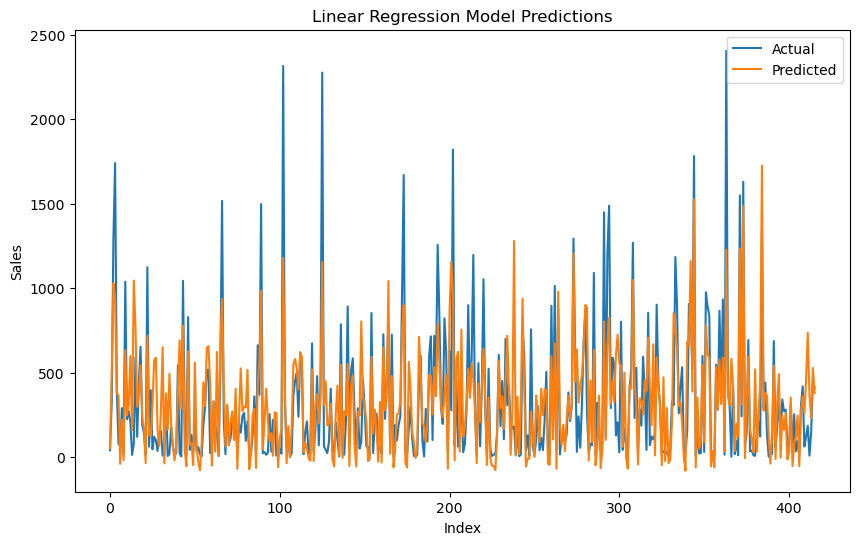

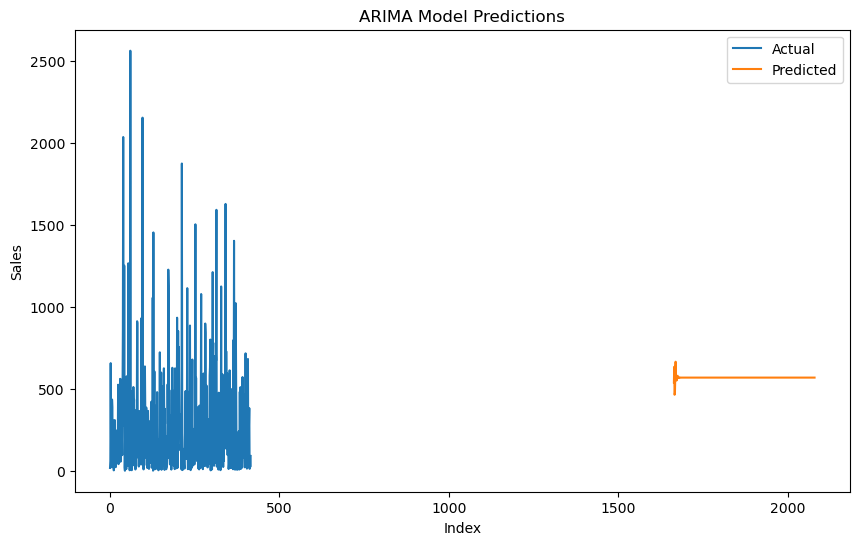

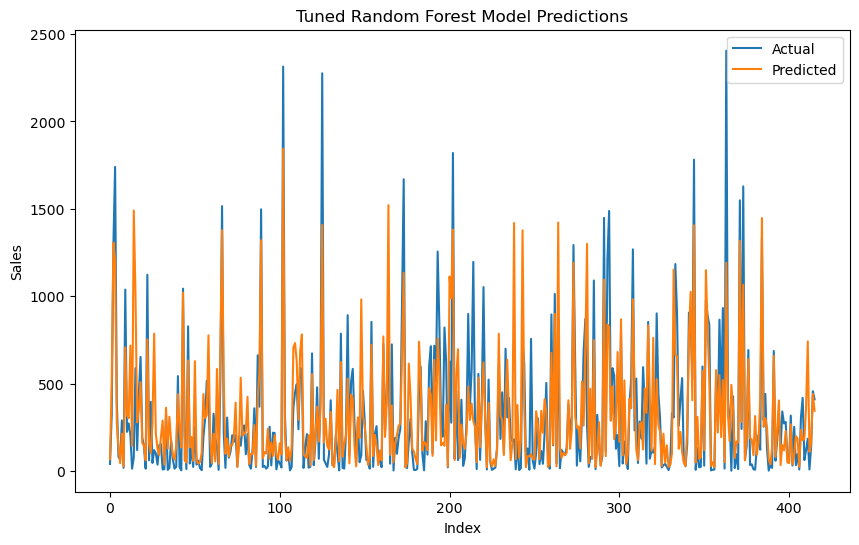

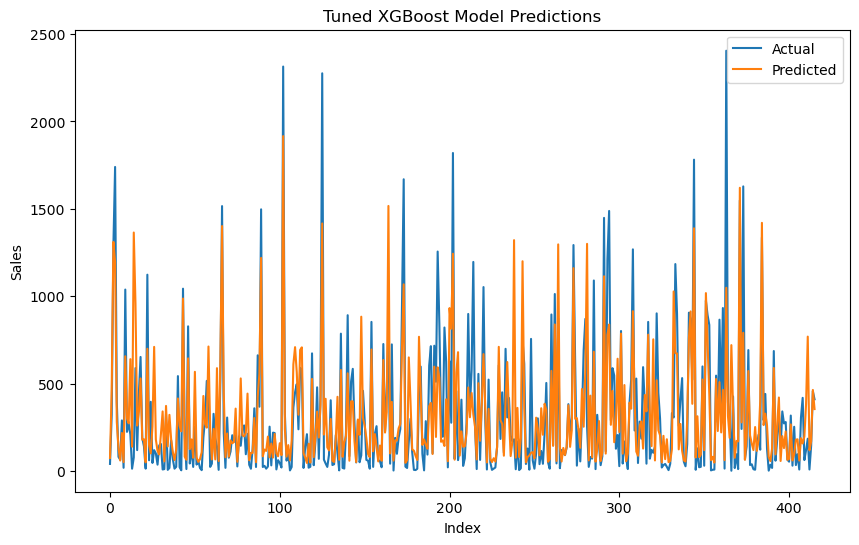

In [30]:
# Plot
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Plot the linear regression model predictions
plot_predictions(y_test, y_test_pred_lr, "Linear Regression Model Predictions")

# Plot the ARIMA model predictions
plot_predictions(test_ts, y_pred_arima, "ARIMA Model Predictions")

# Plot the Random Forest model predictions
plot_predictions(y_test, y_test_pred_best_rf, "Tuned Random Forest Model Predictions")

# Plot the XGBoost model predictions
plot_predictions(y_test, y_test_pred_best_xgb, "Tuned XGBoost Model Predictions")


## 5. Summary

#### Overview

In this project, I aimed to develop a model for sales forecasting, predicting sales week by week for a given dataset. The steps included data loading, feature engineering, model training, and evaluation using various metrics. I utilized Linear Regression, ARIMA, Random Forest, and XGBoost models to achieve this goal.

#### Data Preparation

1. **Loading Data**: I loaded the sales dataset and examined the structure and contents.
2. **Exploratory Data Analysis (EDA)**: I analyzed the data to understand patterns, distributions, and correlations among features. I used correlation matrices to identify relevant features for my models.
3. **Feature Engineering**: I created new features such as rolling means and lag features to help the models capture temporal dependencies in the sales data.

#### Model Training and Evaluation

1. **Linear Regression Model**:
   - **Training**: I trained a Linear Regression model using the selected features.
   - **Evaluation**: The model showed moderate performance with an R² value of 0.573 on the test set. The actual vs. predicted values plot indicated that the model could capture the general trend but struggled with extreme values.

2. **ARIMA Model**:
   - **Training**: I trained an ARIMA model specifically for time series forecasting.
   - **Evaluation**: The model performed poorly, with a negative R² value, indicating that it failed to capture the patterns in the data effectively.

3. **Random Forest Model**:
   - **Initial Training**: The initial Random Forest model showed overfitting, with excellent performance on the training set but not as good on the test set.
   - **Hyperparameter Tuning**: I used GridSearchCV to find the best hyperparameters, improving the model's performance. The tuned model had an R² value of 0.602 on the test set, indicating better generalization.

4. **XGBoost Model**:
   - **Initial Training**: The initial XGBoost model also showed overfitting.
   - **Hyperparameter Tuning**: After tuning with GridSearchCV, the XGBoost model achieved an R² value of 0.605 on the test set, performing slightly better than the Random Forest model.

#### Metrics Used

I used multiple evaluation metrics to assess model performance:
- **MSE (Mean Squared Error)**: Measures the average squared difference between actual and predicted values.
- **RMSE (Root Mean Squared Error)**: Provides a measure of the standard deviation of the residuals.
- **R² (Coefficient of Determination)**: Indicates the proportion of variance in the dependent variable predictable from the independent variables.
- **SMAPE (Symmetric Mean Absolute Percentage Error)**: Measures the accuracy of predictions as a percentage.
- **MAPE (Mean Absolute Percentage Error)**: Measures the accuracy of predictions as a percentage.

#### Visual Evaluation

I plotted the actual vs. predicted values for each model to visually assess performance. The plots for the tuned Random Forest and XGBoost models showed that both models could capture the general trends and fluctuations in the data, though some extreme values were not well-predicted.


